# Chargement des données : La maison de Mickey

## maison de Mickey

### Il l'a fabriquée, Mickey

C'est magique, c'est fantastique

In [14]:
path = "bd/"

In [15]:
import os
import shutil

import numpy as np
import PIL
from PIL import Image
import os, sys
from scipy.io import loadmat


def load_data(data_path, classes, dataset='train', image_size=64):

    num_images = 0
    for i in range(len(classes)):
        dirs = sorted(os.listdir(data_path + classes[i] + '/' + dataset))
        num_images += len(dirs)
                                
    x = np.zeros((num_images, image_size, image_size, 3))
    y = np.zeros((num_images, 1))
    
    current_index = 0
    
    # Parcours des différents répertoires pour collecter les images
    for idx_class in range(len(classes)):
        dirs = sorted(os.listdir(data_path + classes[idx_class] + '/' + dataset))
        num_images += len(dirs)
    
        # Chargement des images, 
        for idx_img in range(len(dirs)):
            item = dirs[idx_img]
            if os.path.isfile(data_path + classes[idx_class] + '/' + dataset + '/' + item) & (item[0] != '.'):
                # Ouverture de l'image
                img = Image.open(data_path + classes[idx_class] + '/' + dataset + '/' + item)
                # Conversion de l'image en RGB
                img = img.convert('RGB')
                # Redimensionnement de l'image et écriture dans la variable de retour x 
                img = img.resize((image_size,image_size))
                x[current_index] = np.asarray(img)
                # Écriture du label associé dans la variable de retour y
                y[current_index] = idx_class
                current_index += 1
                
    return x, y

Voici ensuite un exemple de chargement de vos données. Notez que vous pouvez modifier la dimension des images, ce qui sera utile à différents stades de votre projet.

In [17]:
labels = ['mickey', 'minnie', 'donald', 'daisy', 'dingo', 'pluto']

x_train, y_train = load_data(path, labels, dataset='train', image_size=128)
print(x_train.shape, y_train.shape)

x_val, y_val = load_data(path, labels, dataset='validation', image_size=128)
print(x_val.shape, y_val.shape)

x_test, y_test = load_data(path, labels, dataset='test', image_size=128)
print(x_test.shape, y_test.shape)

## Pourcentages de répartition

count_train = []
count_val = []
count_test = []
total = []
for i in range(len(labels)):
    count_train.append((y_train == i).sum())
    count_val.append((y_val == i).sum())
    count_test.append((y_test == i).sum())
    total.append(count_train[i] + count_val[i] + count_test[i])

for i in range(len(labels)):
    print(f"---- {labels[i]} ---")
    ptrain = count_train[i]/total[i]
    pval = count_val[i]/total[i]
    ptest = count_test[i]/total[i]
    print(f"apprentissage: {ptrain:.2f} \n test: {ptest:.2f} \n validation: {pval:.2f}")

print(f"--- Total ---")

tt = sum(total)
ttrain = sum(count_train)/tt
tval = sum(count_val)/tt
ttest = sum(count_test)/tt
print(f"apprentissage: {ttrain:.2f} \n test: {ttest:.2f} \n validation: {tval:.2f}")


(6, 128, 128, 3) (6, 1)
(134, 128, 128, 3) (134, 1)
(151, 128, 128, 3) (151, 1)
---- mickey ---
apprentissage: 0.11 
 test: 0.47 
 validation: 0.42
---- minnie ---
apprentissage: 0.00 
 test: 0.53 
 validation: 0.47
---- donald ---
apprentissage: 0.00 
 test: 0.49 
 validation: 0.51
---- daisy ---
apprentissage: 0.00 
 test: 0.55 
 validation: 0.45
---- dingo ---
apprentissage: 0.00 
 test: 0.52 
 validation: 0.48
---- pluto ---
apprentissage: 0.00 
 test: 0.59 
 validation: 0.41
--- Total ---
apprentissage: 0.02 
 test: 0.52 
 validation: 0.46


Vous pouvez utiliser le bloc suivant pour afficher quelques-unes de vos images, et ainsi vérifier que tout s'est bien passé.

C:\Users\cleme\AppData\Local\Temp\ipykernel_10260\1500025163.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(labels[int(y_test[shuffle_indices[i]])])


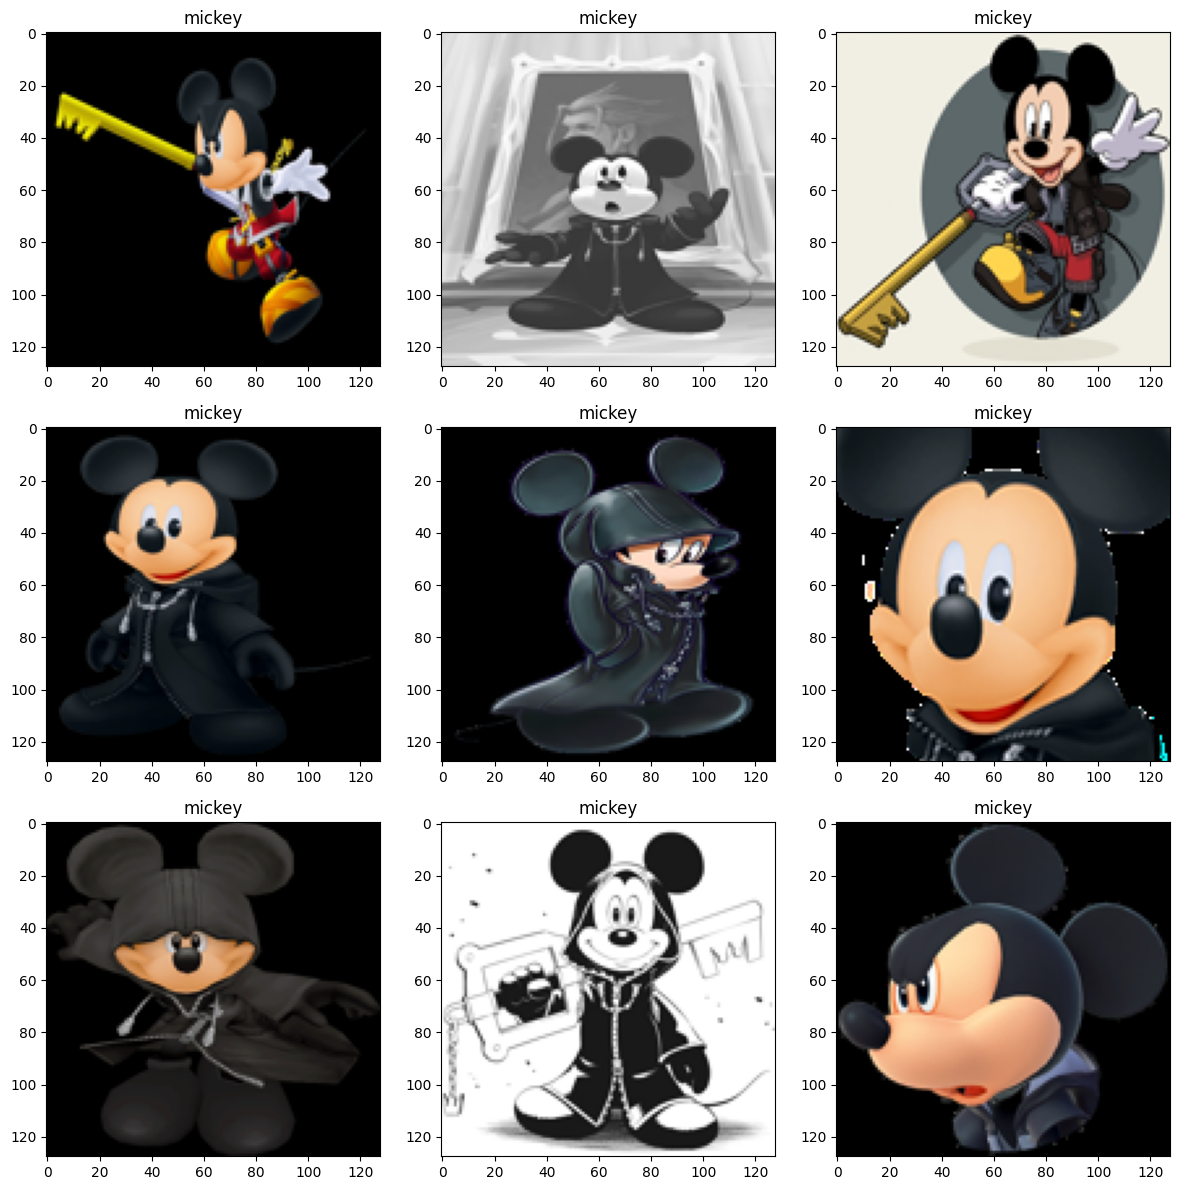

In [22]:
import random
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))
n = len(y_test)
shuffle_indices = random.sample(range(n), 9)
for i in range(0, 9):
    plt.subplot(3, 3, i+1)
    image = x_test[shuffle_indices[i]]
    plt.title(labels[int(y_test[shuffle_indices[i]])])
    plt.imshow(image/255)

plt.tight_layout()
plt.show()